## Coffee Shop Sales

#### Problem Statement:

You've recently become a franchise owner at Maven Roasters, a coffee shop chain with three locations around New York City. Now to better understand purchase behaviour and help streamline operations, you've collected transactional data from the first half of 2023, and your goal here is to transform that data into an interactive, dynamic dashboard that you and other franchise owners can use to identify patterns, trends and opportunities for the business. So, we're gonna break things down into three core objectives.

 - Objective one is all about profilling and preparing that raw data for analysis.
  
 - Objective two is about exploring the data using Excel Pivot Tables and finally,
  
 - Objective three is about bringing that data to life and designing and building a dynamic dashboard to visualize patterns and trends in the data, and ideally come up with some interesting recommendations for the Maven Roasters business.

<b>Data Dictionary</b>

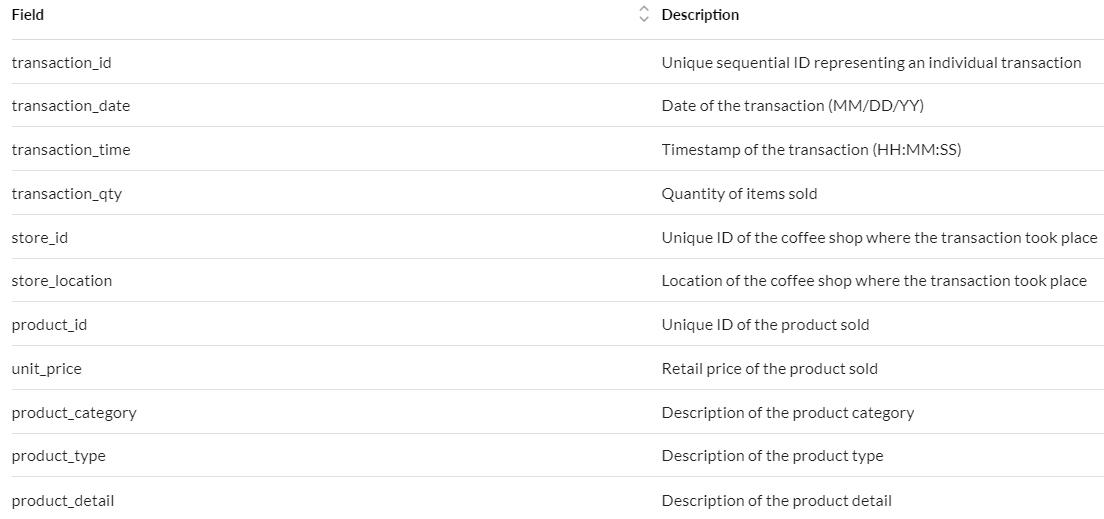

In [38]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [39]:
# import dataset
data = pd.read_excel("Coffee Shop Sales.xlsx")
data.shape

(149116, 15)

In [40]:
# check first five records
data.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,Revenue,Month,Day of Week,Hour
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.0,Jan,Sun,7
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,Jan,Sun,7
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.0,Jan,Sun,7
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.0,Jan,Sun,7
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,Jan,Sun,7


In [41]:
# check datatypes
data.dtypes

transaction_id               int64
transaction_date    datetime64[ns]
transaction_time            object
transaction_qty              int64
store_id                     int64
store_location              object
product_id                   int64
unit_price                 float64
product_category            object
product_type                object
product_detail              object
Revenue                    float64
Month                       object
Day of Week                 object
Hour                         int64
dtype: object

In [42]:
# descriptive statistics
data.describe(include='all').T

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8924\3188151485.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe(include='all').T


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
transaction_id,149116.0,NaN,NaN,NaN,NaT,NaT,74737.371872,43153.600016,1.0,37335.75,74727.5,112094.25,149456.0
transaction_date,149116,181,2023-06-19 00:00:00,1343,2023-01-01,2023-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
transaction_time,149116,25762,09:31:15,41,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
transaction_qty,149116.0,NaN,NaN,NaN,NaT,NaT,1.438276,0.542509,1.0,1.0,1.0,2.0,8.0
store_id,149116.0,NaN,NaN,NaN,NaT,NaT,5.342063,2.074241,3.0,3.0,5.0,8.0,8.0
store_location,149116,3,Hell's Kitchen,50735,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_id,149116.0,NaN,NaN,NaN,NaT,NaT,47.918607,17.93002,1.0,33.0,47.0,60.0,87.0
unit_price,149116.0,NaN,NaN,NaN,NaT,NaT,3.382219,2.658723,0.8,2.5,3.0,3.75,45.0
product_category,149116,9,Coffee,58416,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_type,149116,29,Brewed Chai tea,17183,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
# concise info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
 11  Revenue           149116 non-null  float64       
 12  Month             149116 non-null  object        
 13  Day of Week       149116 non-null  object        
 14  Hour

In [44]:
# check for null values
data.isnull().sum()

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
Revenue             0
Month               0
Day of Week         0
Hour                0
dtype: int64

In [45]:
# check for duplicates
data.duplicated().sum()

0

Initial Findings:

 - Total Transactions: 149116
 - Time Period: 6 Months starting from 01-01-2023 till 06-30-2023.
 - Store Locations: 3 ('Hell's Kitchen', 'Astoria', 'Lower Manhattan')
 - Product Categories: 9 ('Coffee', 'Tea', 'Bakery', 'Drinking Chocolate', 'Flavours', 'Coffee beans', 'Loose Tea', 'Branded', 'Packaged Chocolate')
 - Product Types: 29

No missing values and duplicate records found. We will proceed with Exploratory Data Analysis.

In [46]:
# Monthly Revenue
data.groupby(['Month'])['Revenue'].sum().reindex(index=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'])

Month
Jan     81677.74
Feb     76145.19
Mar     98834.68
Apr    118941.08
May    156727.76
Jun    166485.88
Name: Revenue, dtype: float64

In [49]:
# Store-Location-wise Revenue
data.groupby(['store_location'])['Revenue'].sum()

store_location
Astoria            232243.91
Hell's Kitchen     236511.17
Lower Manhattan    230057.25
Name: Revenue, dtype: float64

In [50]:
# Transactions by Product-Category
data.groupby(['product_category'])['transaction_id'].count()

product_category
Bakery                22796
Branded                 747
Coffee                58416
Coffee beans           1753
Drinking Chocolate    11468
Flavours               6790
Loose Tea              1210
Packaged Chocolate      487
Tea                   45449
Name: transaction_id, dtype: int64

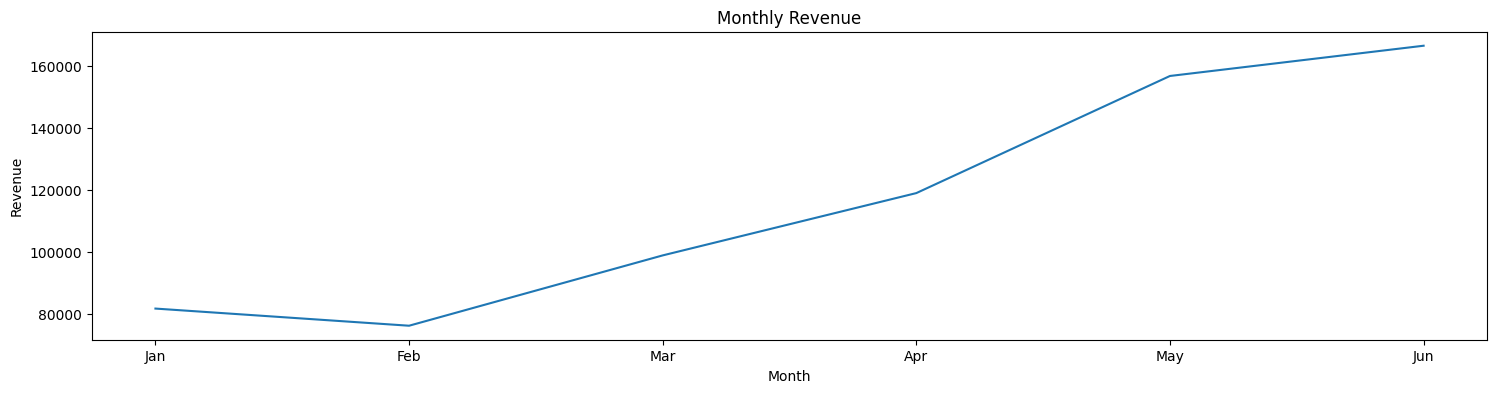

In [48]:
plt.figure(figsize=(18,4))
# Monthly Revenue
sns.lineplot(data=data, x='Month', y='Revenue', estimator=np.sum, ci=None)
plt.title("Monthly Revenue")
plt.show()